In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\data\\machine learning data\\Advertising.csv")

df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spent'] = df['TV'] + df['Newspaper'] + df['Radio']

In [5]:
df.head(5)

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spent', ylabel='Sales'>

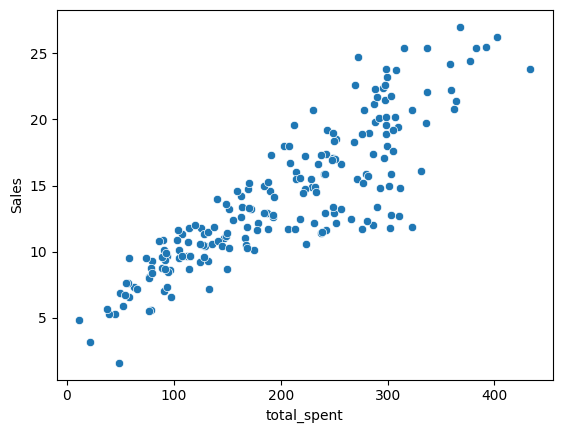

In [6]:
sns.scatterplot(x="total_spent",y="Sales",data=df)

In [7]:
plt.style.use("fivethirtyeight")

<Axes: xlabel='total_spent', ylabel='Sales'>

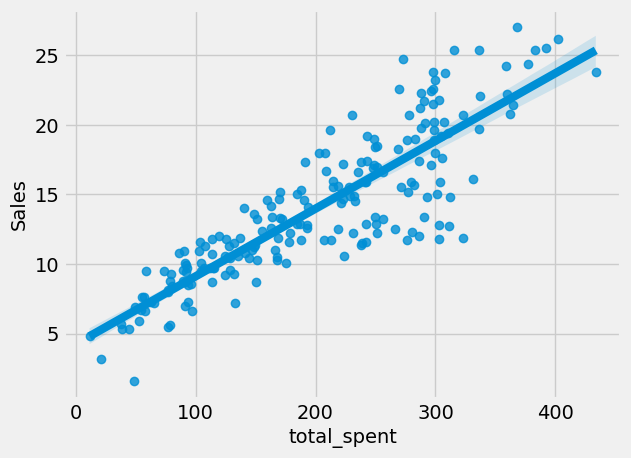

In [8]:
sns.regplot(x="total_spent",y="Sales",data=df)

In [9]:
X = df['total_spent']
y = df['Sales']

In [10]:
# help(np.polyfit)

In [11]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [12]:
potential_spent = np.linspace(0,500,100)
predicted_sales = 0.04868788*potential_spent + 4.24302822

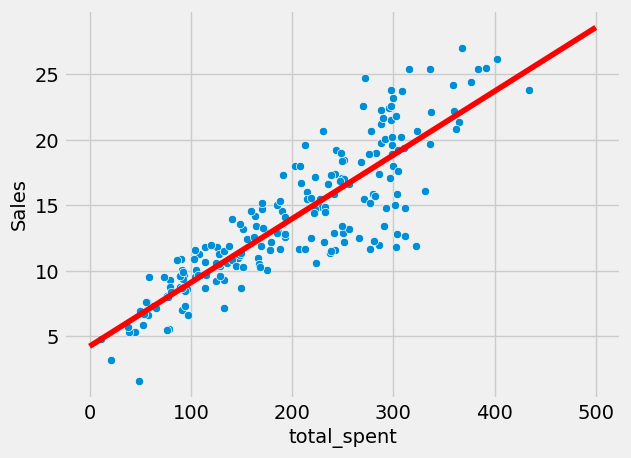

In [13]:
sns.scatterplot(x="total_spent",y="Sales",data=df)
plt.plot(potential_spent, predicted_sales, color="red")

In [14]:
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
pot_spent = np.linspace(0,500,100)

In [16]:
pre_values = 3.07615033e-07*pot_spent**3 + -1.89392449e-04*pot_spent**2 + 8.20886302e-02*pot_spent +  2.70495053e+00

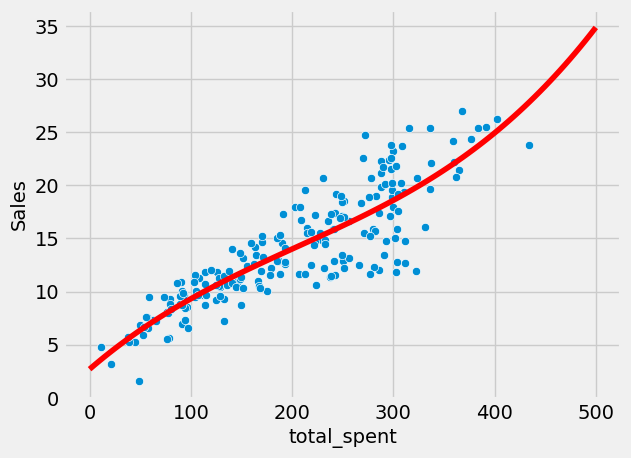

In [17]:
sns.scatterplot(x="total_spent",y="Sales",data=df)
plt.plot(pot_spent, pre_values, color="red")

In [18]:
df.head(5)

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Radio', ylabel='Sales'>

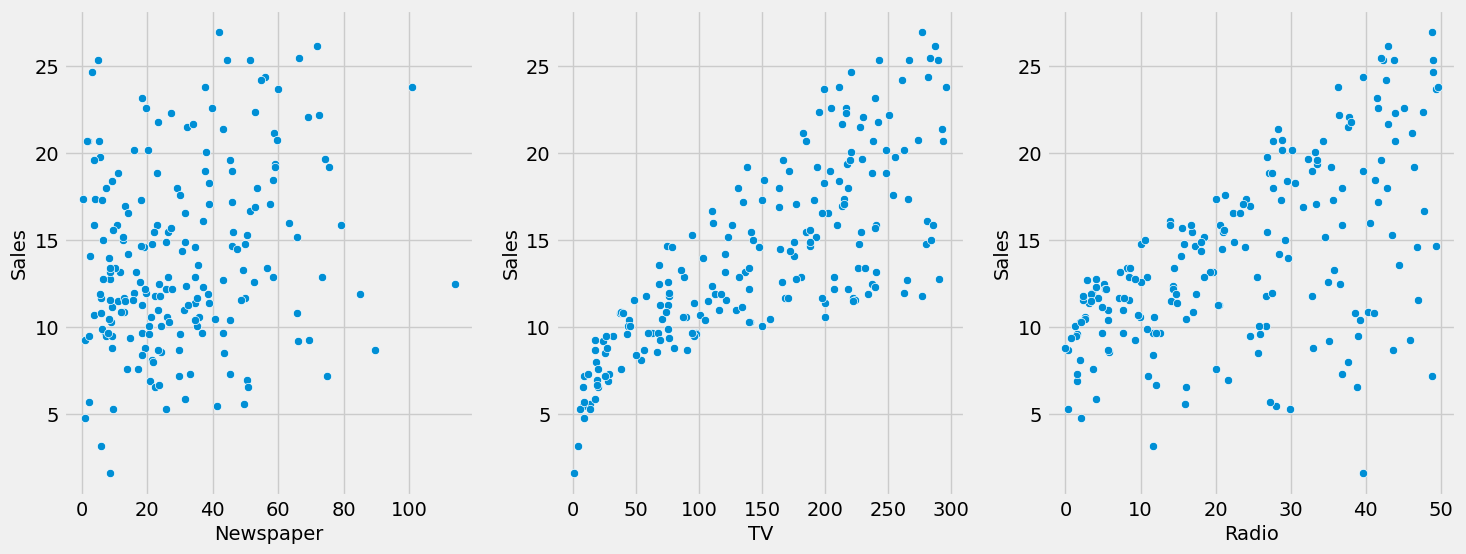

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.scatterplot(x=df['Newspaper'], y=df['Sales'])

plt.subplot(1,3,2)
sns.scatterplot(x=df['TV'], y=df['Sales'])

plt.subplot(1,3,3)
sns.scatterplot(x=df['Radio'], y=df['Sales'])

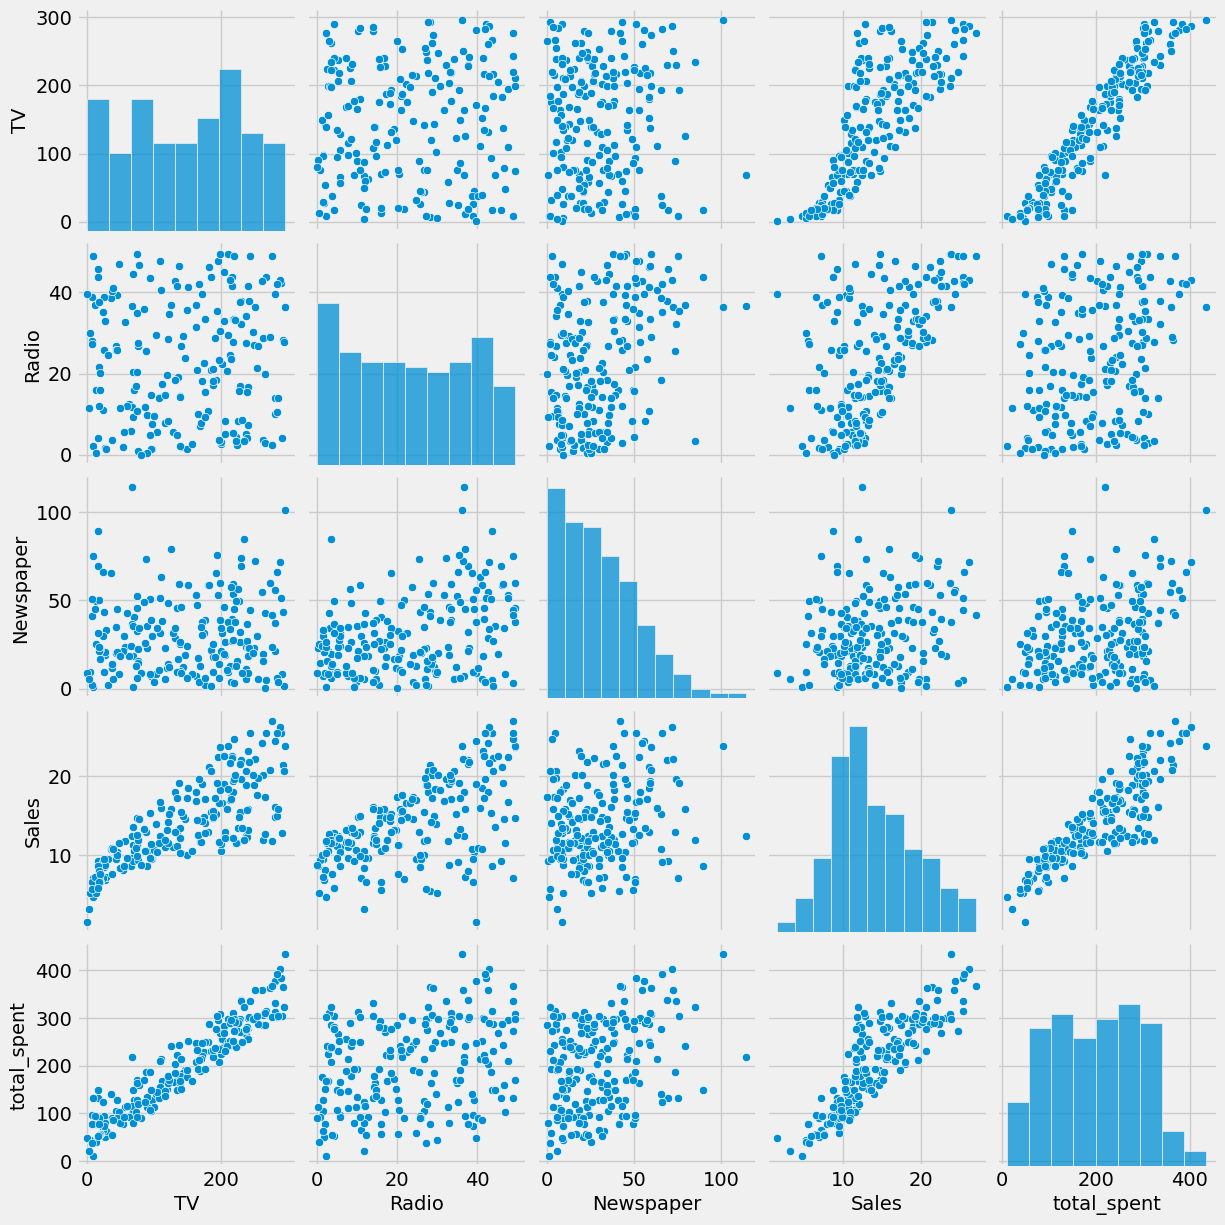

In [20]:
sns.pairplot(df)

In [10]:
X = df.drop('sales',axis=1)

In [11]:
y = df['sales']

In [3]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [17]:
0.04469599/(0.04469599 + 0.1875657 - 0.00032275)

0.19270584749589698

In [18]:
0.1875657/(0.04469599 + 0.1875657 - 0.00032275)

0.8086856825335151

In [19]:
-0.00032275/(0.04469599 + 0.1875657 - 0.00032275)

-0.0013915300294120516

In [49]:
test_predictions =  model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error

In [51]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [52]:
mean_squared_error(y_test, test_predictions)

2.298716697886379

In [53]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882

In [54]:
test_residuals = y_test - test_predictions

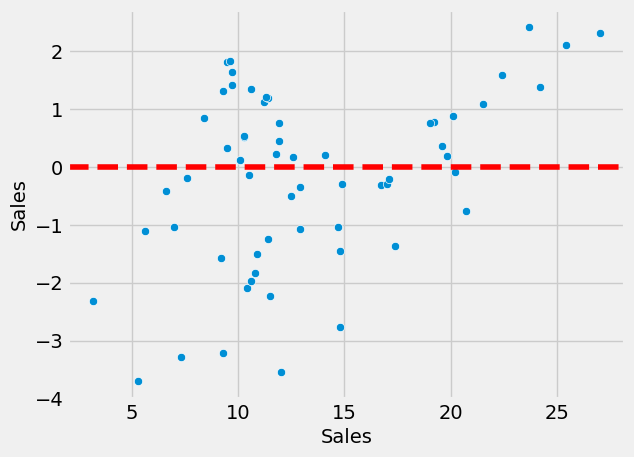

In [55]:
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0,color="red",ls="--")

In [56]:
final_model = LinearRegression()

In [57]:
final_model.fit(X,y)

LinearRegression()

In [58]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
from joblib import dump , load

In [60]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [62]:
loaded_model = load('final_sales_model.joblib')

In [63]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
compain = [[149,20,13]]

In [65]:
loaded_model.predict(compain)

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.51493447])

In [68]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [70]:
X1 = df.drop(['Newspaper','Sales'],axis=1)
y = df['Sales']

In [72]:
X1_train, X1_test , y_train, y_test = train_test_split(X1,y,test_size=0.2, random_state=101)

In [73]:
model1 = LinearRegression()

In [74]:
model1.fit(X1_train, y_train)

LinearRegression()

In [76]:
pred = model1.predict(X1_test)

In [77]:
mean_absolute_error(y_test, pred)

1.1238725224349122

In [78]:
np.sqrt(mean_squared_error(y_test, pred))

1.43588161953483